<a href="https://colab.research.google.com/github/AleksandraOD/Assignments/blob/main/review%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import FreqDist
import re

from wordcloud import WordCloud

from collections import Counter

from collections import Counter
from tabulate import tabulate


nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
file_path = '/content/drive/MyDrive/MIBA/вкр/raw_data_review - Лист2.csv'
data = pd.read_csv(file_path)

                app_name               app_id  rating  \
0  cleaner_money_manager  ru.innim.my_finance       5   
1  cleaner_money_manager  ru.innim.my_finance       4   
2  cleaner_money_manager  ru.innim.my_finance       4   
3  cleaner_money_manager  ru.innim.my_finance       5   
4  cleaner_money_manager  ru.innim.my_finance       3   

                                         review_text    date_of_review  
0  Literally changed my life. So easy and fun to ...  January 23, 2022  
1  It seems that the categories are shown in the ...   January 6, 2021  
2  This app is versatile, customisable and easy t...     April 1, 2024  
3  Amazing! I've tried various budget apps and no...     April 6, 2024  
4  I'm on the fence about this budget app. It has...  January 20, 2024  


In [4]:
 data.head()

,app_name,app_id,rating,review_text,date_of_review,processed_review_text
0,cleaner_money_manager,ru.innim.my_finance,5,Literally changed my life. So easy and fun to ...,"January 23, 2022",liter chang life easi fun track financ app ent...
1,cleaner_money_manager,ru.innim.my_finance,4,It seems that the categories are shown in the ...,"January 6, 2021",seem categori shown diagram without appar orde...
2,cleaner_money_manager,ru.innim.my_finance,4,"This app is versatile, customisable and easy t...","April 1, 2024",app versatil customis easi use coupl featur wo...
3,cleaner_money_manager,ru.innim.my_finance,5,Amazing! I've tried various budget apps and no...,"April 6, 2024",amaz ive tri variou budget app none convinc on...
4,cleaner_money_manager,ru.innim.my_finance,3,I'm on the fence about this budget app. It has...,"January 20, 2024",im fenc budget app realli nice pro enjoy con p...


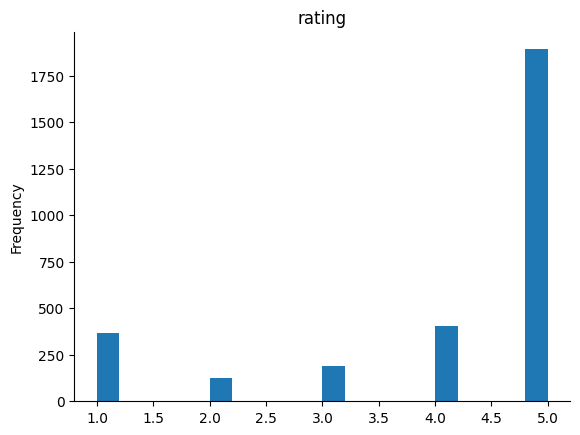

In [5]:
# @title rating

from matplotlib import pyplot as plt
data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
data['rating'].describe()

count    2980.000000
mean        4.119128
std         1.398785
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [7]:
grouped_data = data.groupby('app_name')['rating'].describe()

In [10]:
grouped_data.head(10)

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
cleaner_money_manager,480.0,4.3625,1.046841,1.0,4.0,5.0,5.0,5.0
horoscope_money_manager,500.0,4.7620,0.736506,1.0,5.0,5.0,5.0,5.0
my_money,500.0,4.7040,0.702404,1.0,5.0,5.0,5.0,5.0
real_byte_money_manager,500.0,4.3080,1.211640,1.0,4.0,5.0,5.0,5.0
spendee,500.0,2.6800,1.680252,1.0,1.0,2.0,5.0,5.0
wallet,500.0,3.9080,1.527154,1.0,3.0,5.0,5.0,5.0


<ipython-input-12-e3048395d354>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


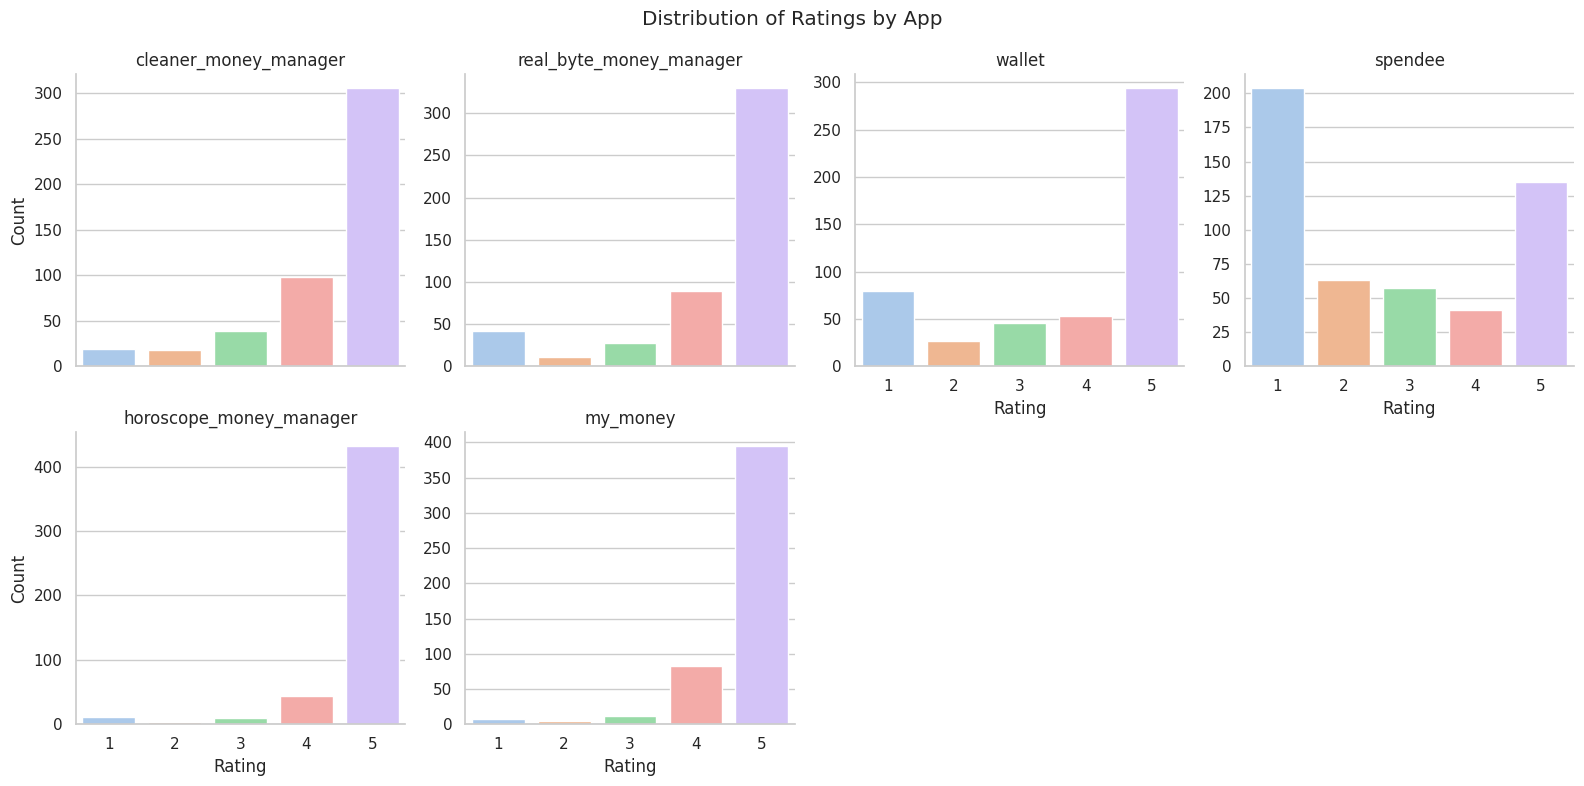

In [12]:

sns.set(style="whitegrid")

# Create a FacetGrid to show the distribution of ratings for each app
g = sns.catplot(
    data=data, kind="count",
    x="rating", col="app_name",
    col_wrap=4, height=4, aspect=1,
    palette="pastel", sharey=False
)

# Set plot titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Rating", "Count")
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in g
g.fig.suptitle('Distribution of Ratings by App')

# Show the plot
plt.show()

In [3]:

nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer
stemmer = PorterStemmer()

# Load English stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join(char for char in text if char.isalpha() or char.isspace())
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words and stem the words
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply the preprocessing function to the review texts
data['processed_review_text'] = data['review_text'].apply(preprocess_text)

# Display the first few rows of the dataset to see the processed text
print(data[['review_text', 'processed_review_text']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                         review_text  \
0  Literally changed my life. So easy and fun to ...   
1  It seems that the categories are shown in the ...   
2  This app is versatile, customisable and easy t...   
3  Amazing! I've tried various budget apps and no...   
4  I'm on the fence about this budget app. It has...   

                               processed_review_text  
0  liter chang life easi fun track financ app ent...  
1  seem categori shown diagram without appar orde...  
2  app versatil customis easi use coupl featur wo...  
3  amaz ive tri variou budget app none convinc on...  
4  im fenc budget app realli nice pro enjoy con p...  


In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def clean_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Filter out the stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [18]:
data['cleaned_review_text'] = data['processed_review_text'].apply(clean_text)

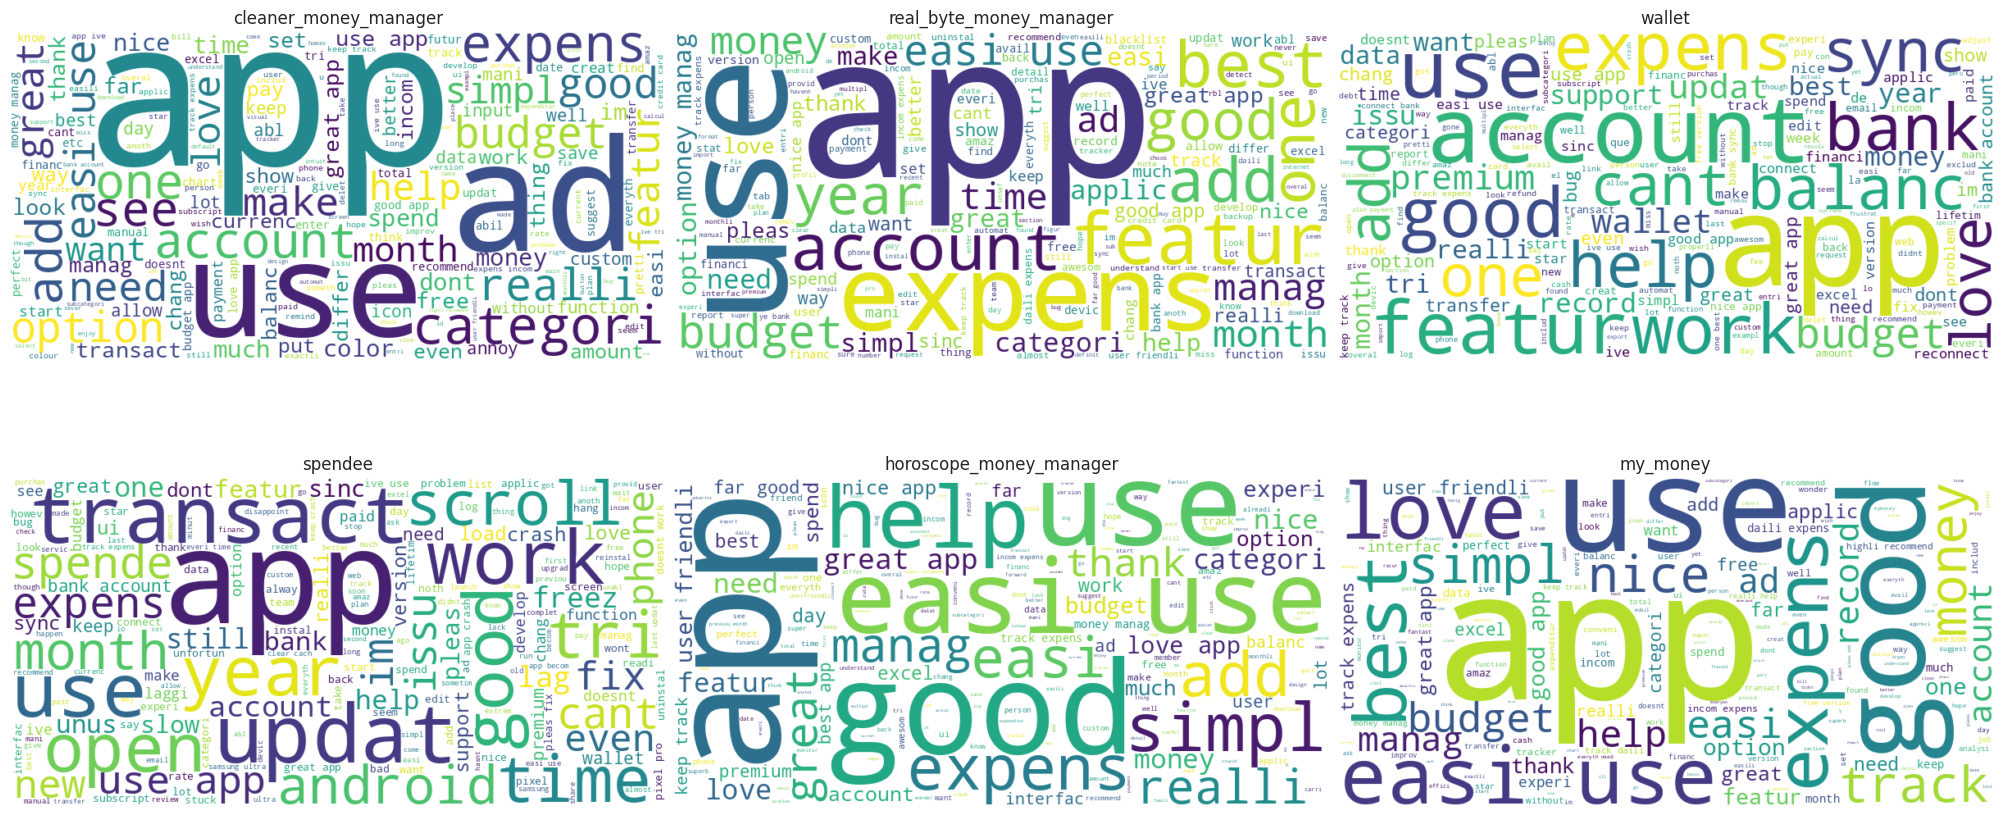

In [19]:
def generate_word_clouds(data):
    # Set up the matplotlib figure
    plt.figure(figsize=(20, 10))

    # Get unique app names
    apps = data['app_name'].unique()

    # Iterate over each app to create a word cloud
    for i, app in enumerate(apps, 1):
        # Filter reviews for the current app
        app_reviews = data[data['app_name'] == app]['cleaned_review_text']
        all_text = ' '.join(review for review in app_reviews)

        # Generate a word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

        # Add subplot for each app
        plt.subplot((len(apps) + 2) // 3, 3, i)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(app)

    # Adjust layout
    plt.tight_layout(pad=0.5)
    # Display the plot
    plt.show()


generate_word_clouds(data)


### Explanation
- **Loading spaCy Model**: The `nlp` object is a callable that processes text and includes various NLP tools. In this case, it’s used for POS tagging.
- **POS Tagging Function**: The function `add_pos_tags` processes a given text and returns a list of tuples, where each tuple contains a token and its corresponding POS tag.
- **Applying POS Tagging**: The POS tagging is applied to each review text in the DataFrame. It's efficient but can be time-consuming for large datasets.
- **Saving Results**: The DataFrame, now containing a new column with POS tags, is saved back to a CSV for further analysis or reference.

### Use of POS Tags
- **Feature Engineering**: POS tags can be used as features in machine learning models, particularly for tasks like sentiment analysis, where the type of words (nouns, verbs, adjectives) might influence the sentiment.
- **Filtering Specific POS**: You might want to analyze specific parts of speech, such as adjectives or nouns, to get insights into the aspects of a product that are frequently discussed or the sentiment associated with them.

This approach will enrich your dataset with detailed linguistic features that can enhance subsequent analyses, whether qualitative or quantitative.


In [33]:
nlp = spacy.load('en_core_web_sm')

# Function to add POS tagging to a sentence
def add_pos_tags(text):
    doc = nlp(text)
    tagged_text = [(token.text, token.pos_) for token in doc]
    return tagged_text

# Apply POS tagging to the 'processed_review_text' or appropriate column
data['pos_tags'] = data['cleaned_review_text'].apply(add_pos_tags)

# Optional: Save the results to a new CSV file
data.to_csv('/content/drive/MyDrive/MIBA/вкр/reviews_with_pos_tags.csv', index=False)


KeyboardInterrupt: 

In [ ]:
# Ensure date_of_review is in datetime format
data['date_of_review'] = pd.to_datetime(data['date_of_review'])

# Group data by date and calculate mean rating
trend_data = data.groupby(data['date_of_review'].dt.date)['rating'].mean()

# Plot the trend of ratings over time
plt.figure(figsize=(12, 6))
trend_data.plot(title='Trend of Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


In [ ]:
data.dtypes


In [ ]:
data['processed_review_text'] = data['processed_review_text'].astype(str)

def plot_frequency_by_app(data, app_name):
    # Filter data for a specific app
    app_data = data[data['app_name'] == app_name]

    # Tokenize words in the review texts
    words = word_tokenize(' '.join(app_data['processed_review_text']))

    # Create the frequency distribution
    freq_dist = FreqDist(words)

    # Plot the most common words in the reviews for this app
    freq_dist.plot(30, title=f'Most Common Words in Reviews for {app_name}')

# Get a list of unique apps
app_names = data['app_name'].unique()

# Plot frequency distributions for each app
for app in app_names:
    plot_frequency_by_app(data, app)
    plt.show()



In [ ]:
# Function to calculate word frequencies for each app
def get_word_frequencies(data):
    app_word_freq = {}
    for app in data['app_name'].unique():
        # Filter reviews by app
        app_reviews = data[data['app_name'] == app]['processed_review_text']
        # Tokenize and count words
        all_words = word_tokenize(' '.join(app_reviews).lower())
        word_freq = Counter(all_words)
        app_word_freq[app] = word_freq
    return app_word_freq

# Get word frequencies per app
word_frequencies = get_word_frequencies(data)

In [ ]:
# Convert the dictionary of Counter objects into a DataFrame
freq_df = pd.DataFrame.from_dict({k: dict(v) for k, v in word_frequencies.items()}, orient='index').fillna(0)
freq_df = freq_df.transpose()


In [ ]:
freq_df

In [ ]:
top_words = freq_df.sum(axis=1).sort_values(ascending=False).head(10)

In [ ]:
top_words

In [ ]:
freq_df.loc[top_words.index]

In [ ]:
freq_df.head(10)

In [ ]:
def display_frequency_table():
    word_frequencies = get_word_frequencies(data)
    freq_df = pd.DataFrame.from_dict({k: dict(v) for k, v in word_frequencies.items()}, orient='index').fillna(0).transpose()

    # Display using tabulate
    print(tabulate(freq_df.head(10), headers='keys', tablefmt='psql', showindex=True))

display_frequency_table()


In [ ]:
!pip install transformers torch


In [ ]:
from transformers import pipeline

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)



In [ ]:
file_path = '/content/drive/MyDrive/MIBA/вкр/raw_data_review - Лист2.csv'
data = pd.read_csv(file_path)

In [ ]:
def get_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']

In [ ]:
data['sentiment'], data['sentiment_score'] = zip(*data['review_text'].apply(get_sentiment))

In [ ]:
data.to_csv('/content/drive/MyDrive/MIBA/вкр/updated_dataset.csv', index=False)

In [ ]:
sentiment_counts = data['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
# Calculate the Pearson correlation coefficient
correlation = data['rating'].corr(data['sentiment_score'])
print("Correlation coefficient:", correlation)

In [ ]:
from textblob import TextBlob

# Calculate polarity and subjectivity
data['polarity'] = data['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['review_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# New correlation check
correlation_polarity = data['rating'].corr(data['polarity'])
correlation_subjectivity = data['rating'].corr(data['subjectivity'])

print("Correlation between Rating and Polarity:", correlation_polarity)
print("Correlation between Rating and Subjectivity:", correlation_subjectivity)


In [7]:
data_path = '/content/drive/MyDrive/MIBA/вкр/aspects_dataset.csv'
data = pd.read_csv(data_path)


In [5]:
data.head()

,app_name,app_id,rating,review_text,processed_review_text,aspect_sentiments
0,cleaner_money_manager,ru.innim.my_finance,5,Literally changed my life. So easy and fun to ...,liter chang life easi fun track financ app ent...,"{'track': ['positive'], 'expens': ['positive']..."
1,cleaner_money_manager,ru.innim.my_finance,4,It seems that the categories are shown in the ...,seem categori shown diagram without appar orde...,"{'diagram': ['positive'], 'order': ['positive'..."
2,cleaner_money_manager,ru.innim.my_finance,4,"This app is versatile, customisable and easy t...",app versatil customis easi use coupl featur wo...,"{'coupl': ['positive'], 'order': ['positive'],..."
3,cleaner_money_manager,ru.innim.my_finance,5,Amazing! I've tried various budget apps and no...,amaz ive tri variou budget app none convinc on...,"{'variou': ['neutral'], 'budget': ['neutral'],..."
4,cleaner_money_manager,ru.innim.my_finance,3,I'm on the fence about this budget app. It has...,im fenc budget app realli nice pro enjoy con p...,"{'enjoy': ['positive'], 'sync': ['positive'], ..."


In [8]:
nlp = spacy.load("en_core_web_sm")
sid = SentimentIntensityAnalyzer()


In [9]:
def extract_aspects_and_analyze_sentiment(text):
    doc = nlp(text)
    aspect_sentiments = {}

    for token in doc:
        if token.pos_ == 'NOUN':  # Assuming nouns are potential aspects
            aspect = token.text
            # Sentence containing the aspect
            sentence = token.sent.root.sent

            # Sentiment analysis on the sentence
            sentiment_score = sid.polarity_scores(sentence.text)
            sentiment = 'neutral'
            if sentiment_score['compound'] > 0.1:
                sentiment = 'positive'
            elif sentiment_score['compound'] < -0.1:
                sentiment = 'negative'

            # Append sentiment to the aspect in dictionary
            if aspect in aspect_sentiments:
                aspect_sentiments[aspect].append(sentiment)
            else:
                aspect_sentiments[aspect] = [sentiment]

    return aspect_sentiments


In [10]:
data['processed_review_text'] = data['processed_review_text'].fillna('')

In [11]:
import spacy

nlp = spacy.load("en_core_web_sm")

def process_text(text):
    if isinstance(text, str):
        return nlp(text)
    else:
        return None

data['processed_review_text'] = data['processed_review_text'].apply(process_text)


In [29]:
data['aspect_sentiments'] = data['processed_review_text'].apply(extract_aspects_and_analyze_sentiment)


In [13]:
data.head()

,app_name,app_id,rating,review_text,processed_review_text,aspect_sentiments
0,cleaner_money_manager,ru.innim.my_finance,5,Literally changed my life. So easy and fun to ...,"(liter, chang, life, easi, fun, track, financ,...","{'track': ['positive'], 'expens': ['positive']..."
1,cleaner_money_manager,ru.innim.my_finance,4,It seems that the categories are shown in the ...,"(seem, categori, shown, diagram, without, appa...","{'diagram': ['positive'], 'order': ['positive'..."
2,cleaner_money_manager,ru.innim.my_finance,4,"This app is versatile, customisable and easy t...","(app, versatil, customis, easi, use, coupl, fe...","{'coupl': ['positive'], 'order': ['positive'],..."
3,cleaner_money_manager,ru.innim.my_finance,5,Amazing! I've tried various budget apps and no...,"(amaz, i, ve, tri, variou, budget, app, none, ...","{'variou': ['neutral'], 'budget': ['neutral'],..."
4,cleaner_money_manager,ru.innim.my_finance,3,I'm on the fence about this budget app. It has...,"(i, m, fenc, budget, app, realli, nice, pro, e...","{'enjoy': ['positive'], 'sync': ['positive'], ..."


In [14]:
data['cleaned_review_text'].drop

KeyError: 'cleaned_review_text'

In [36]:
data.head()

,app_name,app_id,rating,review_text,date_of_review,processed_review_text,cleaned_review_text,pos_tags,aspect_sentiments
0,cleaner_money_manager,ru.innim.my_finance,5,Literally changed my life. So easy and fun to ...,"January 23, 2022","(liter, chang, life, easi, fun, track, financ,...",liter chang life easi fun track financ app ent...,"[('liter', 'PROPN'), ('chang', 'PROPN'), ('lif...","{'track': ['positive'], 'expens': ['positive']..."
1,cleaner_money_manager,ru.innim.my_finance,4,It seems that the categories are shown in the ...,"January 6, 2021","(seem, categori, shown, diagram, without, appa...",seem categori shown diagram without appar orde...,"[('seem', 'VERB'), ('categori', 'PROPN'), ('sh...","{'diagram': ['positive'], 'order': ['positive'..."
2,cleaner_money_manager,ru.innim.my_finance,4,"This app is versatile, customisable and easy t...","April 1, 2024","(app, versatil, customis, easi, use, coupl, fe...",app versatil customis easi use coupl featur wo...,"[('app', 'PROPN'), ('versatil', 'PROPN'), ('cu...","{'coupl': ['positive'], 'order': ['positive'],..."
3,cleaner_money_manager,ru.innim.my_finance,5,Amazing! I've tried various budget apps and no...,"April 6, 2024","(amaz, i, ve, tri, variou, budget, app, none, ...",amaz ive tri variou budget app none convinc on...,"[('amaz', 'ADV'), ('i', 'PRON'), ('ve', 'VERB'...","{'variou': ['neutral'], 'budget': ['neutral'],..."
4,cleaner_money_manager,ru.innim.my_finance,3,I'm on the fence about this budget app. It has...,"January 20, 2024","(i, m, fenc, budget, app, realli, nice, pro, e...",im fenc budget app realli nice pro enjoy con p...,"[('i', 'PRON'), ('m', 'VERB'), ('fenc', 'PROPN...","{'enjoy': ['positive'], 'sync': ['positive'], ..."


In [14]:
data.drop(columns=['cleaned_review_text'], inplace=True)

In [15]:
data.drop(columns=['pos_tags'], inplace=True)

In [16]:
data.drop(columns=['date_of_review'], inplace=True)

In [28]:
data.head()

,app_name,app_id,rating,review_text,processed_review_text,aspect_sentiments
0,cleaner_money_manager,ru.innim.my_finance,5,Literally changed my life. So easy and fun to ...,"(liter, chang, life, easi, fun, track, financ,...",{}
1,cleaner_money_manager,ru.innim.my_finance,4,It seems that the categories are shown in the ...,"(seem, categori, shown, diagram, without, appa...",{}
2,cleaner_money_manager,ru.innim.my_finance,4,"This app is versatile, customisable and easy t...","(app, versatil, customis, easi, use, coupl, fe...",{}
3,cleaner_money_manager,ru.innim.my_finance,5,Amazing! I've tried various budget apps and no...,"(amaz, i, ve, tri, variou, budget, app, none, ...",{}
4,cleaner_money_manager,ru.innim.my_finance,3,I'm on the fence about this budget app. It has...,"(i, m, fenc, budget, app, realli, nice, pro, e...",{}


In [15]:
def explode_reviews(row):
    if isinstance(row, dict):
        return [{'aspect': aspect, 'sentiment': sentiment}
                for aspect, sentiments in row.items()
                for sentiment in sentiments]
    else:
        print(f"Skipping invalid data: {row}")
        return []

In [4]:
def extract_aspects_sentiments(review):
    aspects_sentiments = []
    for aspect, sentiments in review.items():
        for sentiment in sentiments:
            aspects_sentiments.append((aspect, sentiment))
    return aspects_sentiments

In [26]:
def str_to_dict(input_str):
        return ast.literal_eval(input_str)


In [18]:
import ast

In [27]:
data['aspect_sentiments'] = data['aspect_sentiments'].apply(str_to_dict)

ValueError: malformed node or string: {}

In [22]:
aspect_sentiment_list = []
for review in data['aspect_sentiments']:
    aspect_sentiment_list.extend(extract_aspects_sentiments(review))

In [23]:
aspect_sentiment_df = pd.DataFrame(aspect_sentiment_list, columns=['aspect', 'sentiment'])

In [24]:
aspect_sentiment_df.head(10)

,aspect,sentiment


In [35]:
sentiment_counts = aspect_sentiment_df.groupby(['aspect', 'sentiment']).size().reset_index(name='count')

In [41]:
aspect_counts_fq.to_csv('/content/drive/MyDrive/MIBA/вкр/aspects_sentiment_counts.csv', index=False)

In [42]:
sentiment_counts.head(10)

,aspect,sentiment,count
0,aap,positive,1
1,abil,positive,4
2,abl,negative,3
3,abl,neutral,3
4,abl,positive,15
5,absolut,positive,7
6,acc,positive,1
7,access,negative,2
8,access,neutral,3
9,access,positive,14


In [37]:
aspect_counts_fq = aspect_sentiment_df['aspect'].value_counts()



In [39]:
aspect_counts_fq.head(100)

aspect
app        1066
expens      527
use         503
account     300
money       293
           ... 
incom        27
section      27
delet        27
reason       27
number       26
Name: count, Length: 100, dtype: int64

In [40]:
aspect_counts_fq.to_csv('/content/drive/MyDrive/MIBA/вкр/aspects.csv', index=False)

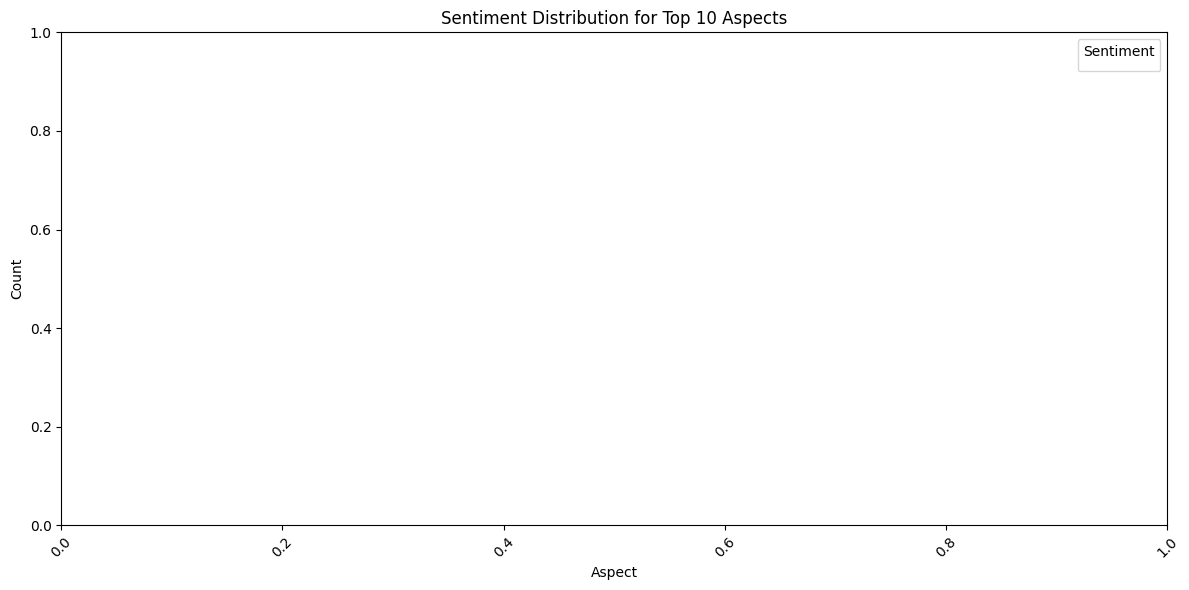

In [48]:
top_10_aspects = aspect_counts_fq.head(10)

# Filter the DataFrame to include only rows corresponding to the top 10 aspects
top_10_df = aspect_sentiment_df[aspect_sentiment_df['aspect'].isin(top_10_aspects)]

# Plot the sentiment distribution for each aspect
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_df, x='aspect', hue='sentiment', order=top_10_aspects)
plt.title('Sentiment Distribution for Top 10 Aspects')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [53]:
top_10_aspects

aspect
app        1066
expens      527
use         503
account     300
money       293
ad          281
track       239
time        218
simpl       212
budget      210
Name: count, dtype: int64

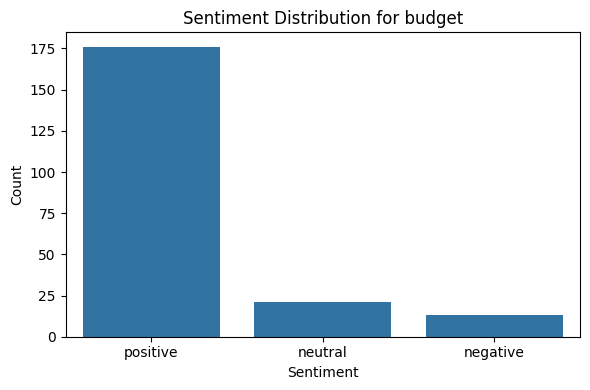

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the aspect for visualization
aspect_to_visualize = 'budget'

# Filter the DataFrame to include only rows corresponding to the selected aspect
aspect_df_filtered = aspect_sentiment_df[aspect_sentiment_df['aspect'] == aspect_to_visualize]

# Plot the sentiment distribution for the selected aspect
plt.figure(figsize=(6, 4))
sns.countplot(data=aspect_df_filtered, x='sentiment')
plt.title(f'Sentiment Distribution for {aspect_to_visualize}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [65]:
negative_df = aspect_sentiment_df[aspect_sentiment_df['sentiment'] == 'negative']
aspect_negative_counts = negative_df['aspect'].value_counts()

# Get the top 5 aspects with the highest counts of negative sentiments
top_5_negative_aspects = aspect_negative_counts.head(5)

# Print the top 5 aspects with negative sentiment counts
print("Top 5 aspects with negative sentiment counts:")
print(top_5_negative_aspects)

Top 5 aspects with negative sentiment counts:
aspect
app      104
ad        48
time      45
month     40
use       37
Name: count, dtype: int64
